In [6]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline

# Simple Polynomial Regression

In [9]:
X = 6 * np.random.rand(200, 1) - 3
y = 0.8 * X**2 + 0.9 * X + 2 + np.random.randn(200,1)

#y = 0.8x^2 + 0.9X + 2

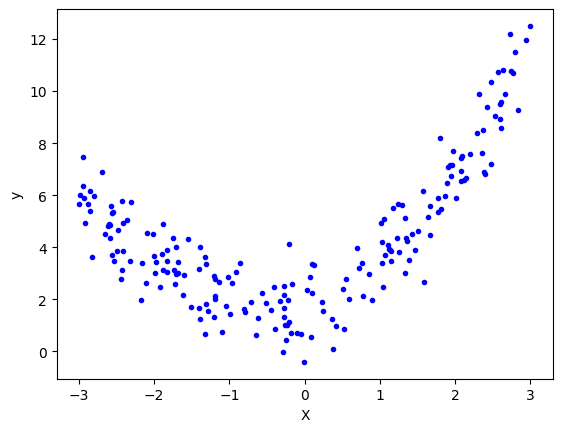

In [13]:
plt.plot(X, y, "b.")
plt.xlabel("X")
plt.ylabel("y")
plt.show()

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# Applying Linear Regression

In [18]:
lr = LinearRegression()

In [26]:
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print(r2_score(y_test, y_pred))
print(lr.coef_)
print(lr.intercept_)

0.2621311884078932
[[0.68343847]]
[4.35848948]


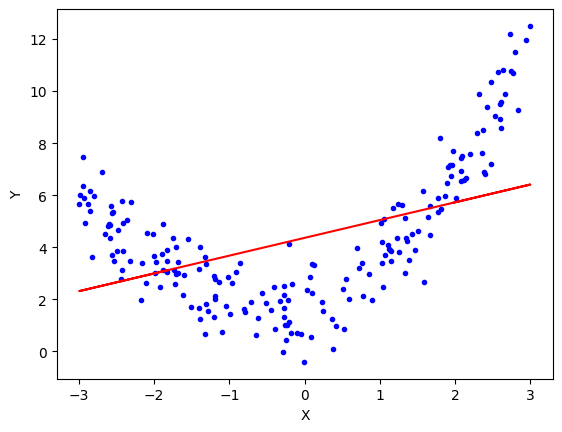

In [28]:
plt.plot(X, y, "b.")
plt.plot(X_train, lr.predict(X_train), color = "red")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

# Polynomial Linear Regression

In [33]:
# degree 2
poly = PolynomialFeatures(degree=2, include_bias=True) # include_bias default value = True
# Always apply on input features i.e "X" not on target features i.e "Y"
# Always apply transformation on both train and test
X_train_trans = poly.fit_transform(X_train)
X_test_trans = poly.transform(X_test)

In [35]:
print(X_train[0])
print(X_train_trans[0])

[-1.82566124]
[ 1.         -1.82566124  3.33303898]


In [37]:
# With bias parameter, train model using linear regression with transformed value of polynomial
lr_trans = LinearRegression()
lr_trans.fit(X_train_trans, y_train)
y_pred_trans = lr_trans.predict(X_test_trans)
print(r2_score(y_test, y_pred_trans))
print(lr_trans.coef_)
print(lr_trans.intercept_)

0.8607119359241924
[[0.         0.82686882 0.79905787]]
[1.8461568]


In [39]:
X_new = np.linspace(-3, 3, 200).reshape(200,1)
X_new_poly = poly.transform(X_new)
y_new = lr_trans.predict(X_new_poly)

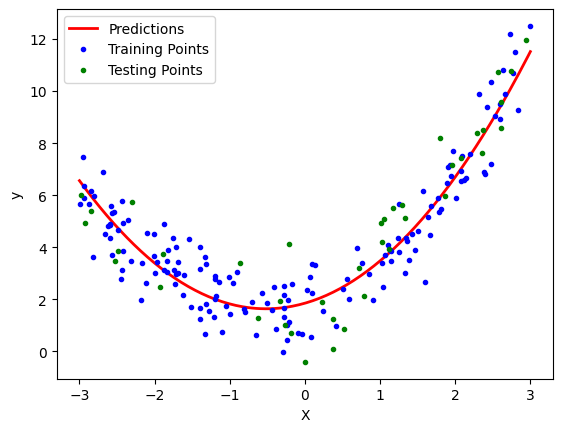

In [41]:
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.plot(X_train, y_train, "b.", label="Training Points")
plt.plot(X_test, y_test, "g.", label="Testing Points")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

In [43]:
def polynomial(degree):
    X_new = np.linspace(-3, 3, 100).reshape(100, 1)
    X_new_poly = poly.transform(X_new)

    polyFeatures = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
        ("PolyFeatures", polyFeatures),
        ("std_scaler", std_scaler),
        ("lin_reg", lin_reg),
    ])

    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)

    plt.plot(X_new, y_newbig, "r", label="Degree " + str(degree), linewidth=2)
    plt.plot(X_train, y_train, "b.", linewidth=3)
    plt.plot(X_test, y_test, "g.", linewidth=3)
    plt.legend(loc="upper left")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.axis([-3, 3, 0, 10])
    plt.show()

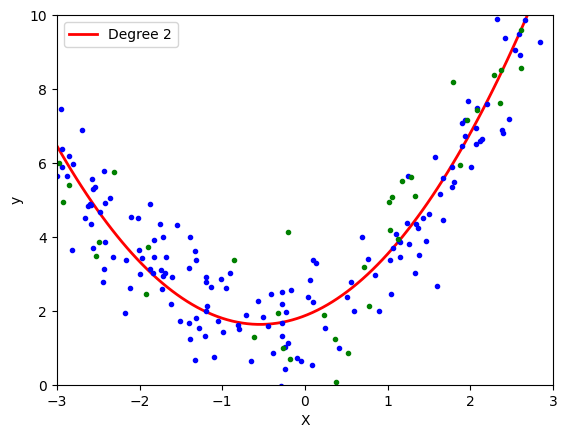

In [53]:
polynomial(2)

# Multi-Dimensional - 3D Polynomial Linear Regression

In [39]:
x = 7 * np.random.rand(100, 1) - 2.8
y = 7 * np.random.rand(100, 1) - 2.8

z = x**2 + y**2 + 0.2*x + 0.2*y + 0.1*x*y + 2 + np.random.randn(100, 1)
# z =x^2 + y^2 + 0.2x + 0.2y + 0.1xy + 2 - Polynominal of degree 2

In [40]:
import plotly.express as px
df = px.data.iris()
fig = px.scatter_3d(df, x=x.ravel(), y=y.ravel(), z=z.ravel())
fig.show()

In [41]:
lr = LinearRegression()
lr.fit(np.array([x,y]).reshape(100,2), z)
x_input = np.linspace(x.min(), x.max(), 10)
y_input = np.linspace(y.min(), y.max(), 10)
xGrid, yGrid = np.meshgrid(x_input, y_input)

final = np.vstack((xGrid.ravel().reshape(1,100), yGrid.ravel().reshape(1,100))).T

z_final = lr.predict(final).reshape(10,10)

In [42]:
import plotly.graph_objects as go

fig = px.scatter_3d(df, x=x.ravel(), y=y.ravel(), z=z.ravel())

fig.add_trace(go.Surface(x = x_input, y = y_input, z =z_final ))

fig.show()

In [43]:
X_multi = np.array([x,y]).reshape(100,2)
X_multi.shape

(100, 2)

In [54]:
poly = PolynomialFeatures(degree=30)
X_multi_trans = poly.fit_transform(X_multi)

In [55]:
# Display the input and output feature names
print("Input Features:", X_multi.shape[1])
print("Output Features:", X_multi_trans.shape[1])
print("Powers\n",poly.powers_)
print("Feature Names:", poly.get_feature_names_out())

Input Features: 2
Output Features: 496
Powers
 [[ 0  0]
 [ 1  0]
 [ 0  1]
 [ 2  0]
 [ 1  1]
 [ 0  2]
 [ 3  0]
 [ 2  1]
 [ 1  2]
 [ 0  3]
 [ 4  0]
 [ 3  1]
 [ 2  2]
 [ 1  3]
 [ 0  4]
 [ 5  0]
 [ 4  1]
 [ 3  2]
 [ 2  3]
 [ 1  4]
 [ 0  5]
 [ 6  0]
 [ 5  1]
 [ 4  2]
 [ 3  3]
 [ 2  4]
 [ 1  5]
 [ 0  6]
 [ 7  0]
 [ 6  1]
 [ 5  2]
 [ 4  3]
 [ 3  4]
 [ 2  5]
 [ 1  6]
 [ 0  7]
 [ 8  0]
 [ 7  1]
 [ 6  2]
 [ 5  3]
 [ 4  4]
 [ 3  5]
 [ 2  6]
 [ 1  7]
 [ 0  8]
 [ 9  0]
 [ 8  1]
 [ 7  2]
 [ 6  3]
 [ 5  4]
 [ 4  5]
 [ 3  6]
 [ 2  7]
 [ 1  8]
 [ 0  9]
 [10  0]
 [ 9  1]
 [ 8  2]
 [ 7  3]
 [ 6  4]
 [ 5  5]
 [ 4  6]
 [ 3  7]
 [ 2  8]
 [ 1  9]
 [ 0 10]
 [11  0]
 [10  1]
 [ 9  2]
 [ 8  3]
 [ 7  4]
 [ 6  5]
 [ 5  6]
 [ 4  7]
 [ 3  8]
 [ 2  9]
 [ 1 10]
 [ 0 11]
 [12  0]
 [11  1]
 [10  2]
 [ 9  3]
 [ 8  4]
 [ 7  5]
 [ 6  6]
 [ 5  7]
 [ 4  8]
 [ 3  9]
 [ 2 10]
 [ 1 11]
 [ 0 12]
 [13  0]
 [12  1]
 [11  2]
 [10  3]
 [ 9  4]
 [ 8  5]
 [ 7  6]
 [ 6  7]
 [ 5  8]
 [ 4  9]
 [ 3 10]
 [ 2 11]
 [ 1 12]
 [ 0 13]
 [14  0]

In [56]:
X_multi_trans.shape

(100, 496)

In [57]:
lr = LinearRegression()
lr.fit(X_multi_trans,z)

LinearRegression()

In [58]:
X_test_multi = poly.transform(final)

In [59]:
z_final = lr.predict(X_multi_trans).reshape(10,10)

In [60]:
fig = px.scatter_3d(x=x.ravel(), y=y.ravel(), z=z.ravel())

fig.add_trace(go.Surface(x = x_input, y = y_input, z =z_final))

fig.update_layout(scene = dict(zaxis = dict(range=[0,35])))

fig.show()